#### download and parse dataset
1. Load recipes from each website json file (3 websites), total of 124647 recipes
2. load_all=False,LEN =20; load only first 20 from each site (total of 60 recipes)
   1. Since similarity is hard compuationaly - better not load all data 
   2. We will calculate similarity matrix i.e NxN/2 similarity calculations..

In [1]:
from app.dotenv import base_dir, data_dir
import os, numpy as np
import pandas as pd; 

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('base_dir:', base_dir)
print('data_dir:', data_dir)



base_dir: /Users/yishai/Desktop/RecipeSimilarity/app
data_dir: /Users/yishai/Desktop/RecipeSimilarity/data


In [2]:

from app.load_dataset import download_zip,parse_json,print_recipe

url=os.getenv('url')#dataset url, saved in .env file
# Check if the file already exists, if not download it
if not os.path.exists(f'{data_dir}/recipes_raw.zip'):# 
    download_zip(data_dir,url = url )
data = parse_json(zip_file_path = f'{data_dir}/recipes_raw.zip',load_all=False,LEN = 20)
data1 = parse_json(zip_file_path = f'{data_dir}/recipes_raw.zip',load_all=False,LEN = 20)

print("\n" + "-"*40 + "\n")#separator between prints

for recipe_id, recipe in data.items():#show the recipes
    print_recipe(pd.Series(recipe))#
    break#run only for the first recipe


dict_keys(['title', 'ingredients', 'instructions', 'picture_link', 'website'])
recipes_raw_nosource_ar.json len: 20
total data len: 20
dict_keys(['ingredients', 'picture_link', 'instructions', 'title', 'website'])
recipes_raw_nosource_epi.json len: 20
total data len: 40
dict_keys(['instructions', 'ingredients', 'title', 'picture_link', 'website'])
recipes_raw_nosource_fn.json len: 20
total data len: 60
dict_keys(['title', 'ingredients', 'instructions', 'picture_link', 'website'])
recipes_raw_nosource_ar.json len: 20
total data len: 20
dict_keys(['ingredients', 'picture_link', 'instructions', 'title', 'website'])
recipes_raw_nosource_epi.json len: 20
total data len: 40
dict_keys(['instructions', 'ingredients', 'title', 'picture_link', 'website'])
recipes_raw_nosource_fn.json len: 20
total data len: 60

----------------------------------------

Title: Slow Cooker Chicken and Dumplings
Ingredients:
 - 4 skinless, boneless chicken breast halves ADVERTISEMENT
 - 2 tablespoons butter ADVERTI


#### Standardize data: 
implement a better structured data model that can accommodate the various attributes of recipes using the above dataset
1. Ensure that each recipe follows the same structure (represented with consistent fields)
2. drop recipes without instructions or ingridiants
3. Flatten ingredients list into separate keys (number of columns according to max value in data)
4. Convert into dataframe (each key into column, each recipe into new row)

In [3]:
from app.preprocess import standardize

df,ingredients_columns = standardize(data.copy(),list(data[0].keys()))
print_recipe(df.loc[0])
df.columns

del data
df.head()

ingredients max num: 24
fields which may have null value: ['picture_link']
recipes without instructions (removed from data): []
recipes without ingredients (removed from data): []
Title: Slow Cooker Chicken and Dumplings
Ingredients:
Instructions:
Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.
Cover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.

Picture Link: 55lznCYBbs2mT8BTx6BTkLhynGHzM.S
Website: ar

----------------------------------------



,title,instructions,picture_link,website,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Slow Cooker Chicken and Dumplings,"Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S,ar,"4 skinless, boneless chicken breast halves ADV...",2 tablespoons butter ADVERTISEMENT,2 (10.75 ounce) cans condensed cream of chicke...,"1 onion, finely diced ADVERTISEMENT",2 (10 ounce) packages refrigerated biscuit dou...,ADVERTISEMENT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Awesome Slow Cooker Pot Roast,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,ar,2 (10.75 ounce) cans condensed cream of mushro...,1 (1 ounce) package dry onion soup mix ADVERTI...,1 1/4 cups water ADVERTISEMENT,5 1/2 pounds pot roast ADVERTISEMENT,ADVERTISEMENT,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Brown Sugar Meatloaf,Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,ar,1/2 cup packed brown sugar ADVERTISEMENT,1/2 cup ketchup ADVERTISEMENT,1 1/2 pounds lean ground beef ADVERTISEMENT,3/4 cup milk ADVERTISEMENT,2 eggs ADVERTISEMENT,1 1/2 teaspoons salt ADVERTISEMENT,1/4 teaspoon ground black pepper ADVERTISEMENT,"1 small onion, chopped ADVERTISEMENT",1/4 teaspoon ground ginger ADVERTISEMENT,3/4 cup finely crushed saltine cracker crumbs ...,ADVERTISEMENT,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Best Chocolate Chip Cookies,Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,ar,"1 cup butter, softened ADVERTISEMENT",1 cup white sugar ADVERTISEMENT,1 cup packed brown sugar ADVERTISEMENT,2 eggs ADVERTISEMENT,2 teaspoons vanilla extract ADVERTISEMENT,3 cups all-purpose flour ADVERTISEMENT,1 teaspoon baking soda ADVERTISEMENT,2 teaspoons hot water ADVERTISEMENT,1/2 teaspoon salt ADVERTISEMENT,2 cups semisweet chocolate chips ADVERTISEMENT,1 cup chopped walnuts ADVERTISEMENT,ADVERTISEMENT,None,None,None,None,None,None,None,None,None,None,None,None
4,Homemade Mac and Cheese Casserole,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm,ar,8 ounces whole wheat rotini pasta ADVERTISEMENT,3 cups fresh broccoli florets ADVERTISEMENT,"1 medium onion, chopped ADVERTISEMENT","3 cloves garlic, minced ADVERTISEMENT","4 tablespoons butter, divided ADVERTISEMENT",2 tablespoons all-purpose flour ADVERTISEMENT,1/4 teaspoon salt ADVERTISEMENT,1/8 teaspoon ground black pepper ADVERTISEMENT,2 1/2 cups milk ADVERTISEMENT,"8 ounces Cheddar cheese, shredded ADVERTISEMENT","4 ounces reduced-fat cream cheese, cubed and s...",1/2 cup fine dry Italian-seasoned bread crumbs...,Reynolds Wrap® Non Stick Aluminum Foil ADVERTI...,ADVERTISEMENT,None,None,None,None,None,None,None,None,None,None


#### Normalize Text: 
   1. clean_text: 
       1. remove encoding characters like \xad, \u00ad, seperate punctuation, 
       2. remove words like 'ADVERTISEMENT' and other non-recipe related terms
       3. converting to lower case
       4. remove leading/trailing whitespaces.
   2. split_number_and_word: split a word containing a number and a word (take1.2 -> take 1.2)
   3. split_un_words: split words starting with 'un' into 'un' and the rest of the word ('unsalted' becomes ['un', 'salted']).

In [4]:

from app.preprocess import normalize_text
df = normalize_text(df.copy(), df.columns)

# df = df[['0']]
print(df.columns)
# df.columns
df.head()



Index(['title', 'instructions', 'picture_link', 'website', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23'],
      dtype='object')


,title,instructions,picture_link,website,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,slow cooker chicken and dumplings,"place the chicken , butter , soup , and onion ...",55 lzncybbs . s,ar,"4 skinless , boneless chicken breast halves",2 tablespoons butter,2 ( 10.75 ounce ) cans condensed cream of chic...,"1 onion , finely diced",2 ( 10 ounce ) packages refrigerated biscuit d...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,awesome slow cooker pot roast,"in a slow cooker , mix cream of mushroom soup ...",qyrvgdgnmba 2,ar,2 ( 10.75 ounce ) cans condensed cream of mush...,1 ( 1 ounce ) package dry onion soup mix,1 1/4 cups water,5 1/2 pounds pot roast,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,brown sugar meatloaf,preheat oven to 350 degrees f ( 175 degrees c ...,lvw 1,ar,1/2 cup packed brown sugar,1/2 cup ketchup,1 1/2 pounds lean ground beef,3/4 cup milk,2 eggs,1 1/2 teaspoons salt,1/4 teaspoon ground black pepper,"1 small onion , chopped",1/4 teaspoon ground ginger,3/4 cup finely crushed saltine cracker crumbs,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,best chocolate chip cookies,preheat oven to 350 degrees f ( 175 degrees c ...,0 so,ar,"1 cup butter , softened",1 cup white sugar,1 cup packed brown sugar,2 eggs,2 teaspoons vanilla extract,3 cups all - purpose flour,1 teaspoon baking soda,2 teaspoons hot water,1/2 teaspoon salt,2 cups semisweet chocolate chips,1 cup chopped walnuts,None,None,None,None,None,None,None,None,None,None,None,None,None
4,homemade mac and cheese casserole,preheat oven to 350 degrees f . line a 2 - qua...,ycnbhplmgiraw 4,ar,8 ounces whole wheat rotini pasta,3 cups fresh broccoli florets,"1 medium onion , chopped","3 cloves garlic , minced","4 tablespoons butter , divided",2 tablespoons all - purpose flour,1/4 teaspoon salt,1/8 teaspoon ground black pepper,2 1/2 cups milk,"8 ounces cheddar cheese , shredded","4 ounces reduced - fat cream cheese , cubed an...",1/2 cup fine dry italian - seasoned bread crumbs,reynolds wrap non stick aluminum foil,None,None,None,None,None,None,None,None,None,None,None


#### extract entities from the ingredients sentences:
1. extract ingredients (2 teaspoons of salt -> salt is the ingredient)
2. extract units in data and their transformation 
   1. example: teaspoon is a volume unit, all volume units are transformed into cups )
3. convert values in text into numeric values (¼ -> 0.25, )
4. extract numeric values in text (2 teaspoons the value is 2)
5. transform values (2 teaspoons are transformed into cups)
6. rows with no units and values are seasoning and ignored (such as: add salt and pepper by taste)

output: for each ingredient a column with amount and unit; before and after the conversion

left to do: 
1. when theres 1¼ instead of output 1.25 there is [1,0.25]
   a. fix: when converting into numeric values  - search for close value and add it (1+0.25)
2. when having more than 1 value/unit output (example: 2 cans where each is 10 oz)
   1. according to proximity find relations to ingredient (noun) and take the correct value

In [5]:
from app.extract_entities.amounts import extract_entities,measurement_units,nlp,sort_columns
df = extract_entities (df.copy(),ingredients_columns)
sorted_columns = sort_columns(df)
df = df[sorted_columns]


In [6]:
df.head()

,title,instructions,picture_link,website,0,0_ingredients,0_converted,1,1_ingredients,1_converted,2,2_ingredients,2_converted,3,3_ingredients,3_converted,4,4_ingredients,4_converted,5,5_ingredients,5_converted,6,6_ingredients,6_converted,7,7_ingredients,7_converted,8,8_ingredients,8_converted,9,9_ingredients,9_converted,10,10_ingredients,10_converted,11,11_ingredients,11_converted,12,12_ingredients,12_converted,13,13_ingredients,13_converted,14,14_ingredients,14_converted,15,15_ingredients,15_converted,16,16_ingredients,16_converted,17,17_ingredients,17_converted,18,18_ingredients,18_converted,19,19_ingredients,19_converted,20,20_ingredients,20_converted,21,21_ingredients,21_converted,22,22_ingredients,22_converted,23,23_ingredients,23_converted
0,slow cooker chicken and dumplings,"place the chicken , butter , soup , and onion ...",55 lzncybbs . s,ar,"4 skinless , boneless chicken breast halves","[skinless, boneless, chicken]","{'0_amount_converted': 4.0, '0_units_converted...",2 tablespoons butter,[butter],"{'1_amount_converted': 0.125, '1_units_convert...",2 ( 10.75 ounce ) cans condensed cream of chic...,"[cream, chicken, soup]","{'2_amount_converted': 0.25, '2_units_converte...","1 onion , finely diced",[onion],"{'3_amount_converted': 1.0, '3_units_converted...",2 ( 10 ounce ) packages refrigerated biscuit d...,"[biscuit, dough]","{'4_amount_converted': 0.25, '4_units_converte...",None,None,"{'5_amount_converted': None, '5_units_converte...",None,None,"{'6_amount_converted': None, '6_units_converte...",None,None,"{'7_amount_converted': None, '7_units_converte...",None,None,"{'8_amount_converted': None, '8_units_converte...",None,None,"{'9_amount_converted': None, '9_units_converte...",None,None,"{'10_amount_converted': None, '10_units_conver...",None,None,"{'11_amount_converted': None, '11_units_conver...",None,None,"{'12_amount_converted': None, '12_units_conver...",None,None,"{'13_amount_converted': None, '13_units_conver...",None,None,"{'14_amount_converted': None, '14_units_conver...",None,None,"{'15_amount_converted': None, '15_units_conver...",None,None,"{'16_amount_converted': None, '16_units_conver...",None,None,"{'17_amount_converted': None, '17_units_conver...",None,None,"{'18_amount_converted': None, '18_units_conver...",None,None,"{'19_amount_converted': None, '19_units_conver...",None,None,"{'20_amount_converted': None, '20_units_conver...",None,None,"{'21_amount_converted': None, '21_units_conver...",None,None,"{'22_amount_converted': None, '22_units_conver...",None,None,"{'23_amount_converted': None, '23_units_conver..."
1,awesome slow cooker pot roast,"in a slow cooker , mix cream of mushroom soup ...",qyrvgdgnmba 2,ar,2 ( 10.75 ounce ) cans condensed cream of mush...,"[cream, mushroom, soup]","{'0_amount_converted': 0.25, '0_units_converte...",1 ( 1 ounce ) package dry onion soup mix,"[package, onion, soup, mix]","{'1_amount_converted': 0.125, '1_units_convert...",1 0.25 cups water,[water],"{'2_amount_converted': 1.0, '2_units_converted...",5 0.5 pounds pot roast,"[pot, roast]","{'3_amount_converted': 2267.96, '3_units_conve...",None,None,"{'4_amount_converted': None, '4_units_converte...",None,None,"{'5_amount_converted': None, '5_units_converte...",None,None,"{'6_amount_converted': None, '6_units_converte...",None,None,"{'7_amount_converted': None, '7_units_converte...",None,None,"{'8_amount_converted': None, '8_units_converte...",None,None,"{'9_amount_converted': None, '9_units_converte...",None,None,"{'10_amount_converted': None, '10_units_conver...",None,None,"{'11_amount_converted': None, '11_units_conver...",None,None,"{'12_amount_converted': None, '12_units_conver...",None,None,"{'13_amount_converted': None, '13_units_conver...",None,None,"{'14_amount_converted': None, '14_units_conver...",None,None,"{'15_amount_converted': None, '15_units_conver...",None,None,"{'16_amount_converted': None, '16_units_conver...",None,None,"{'17_amount_converted': None, '17_units_conver...",None,None,"{'18_amount_conv

In [7]:
# print the first ingridient of the first recepy and its conversion:
print('first ingridient of the first recepy:', df['1'].loc[1])
print('ingredients:', df['1_ingredients'].loc[1])
print('amounts and units after conversion',df['1_converted'].loc[1])


first ingridient of the first recepy: 1 ( 1 ounce ) package dry onion soup mix
ingredients: ['package', 'onion', 'soup', 'mix']
amounts and units after conversion {'1_amount_converted': 0.125, '1_units_converted': ['cup']}


#### Recreate back the ingridients from the entities
1. Combines the entities to a single column of the full recipe ingridients formated  as sentences
2. The entities are after units and amounts conversion

In [8]:
from app.extract_entities.recreate import recreate_ingrediants_from_entities

df = recreate_ingrediants_from_entities(df,ingredients_columns)                        
# df.drop(['picture_link', 'website'],inplace=True,axis = 1)#drop rows with no useful data

print(df.columns)
df.head()



Index(['title', 'instructions', 'picture_link', 'website', 'ingredients'], dtype='object')


,title,instructions,picture_link,website,ingredients
0,slow cooker chicken and dumplings,"place the chicken , butter , soup , and onion ...",55 lzncybbs . s,ar,4.0 skinless boneless chicken. 0.125 cup butt...
1,awesome slow cooker pot roast,"in a slow cooker , mix cream of mushroom soup ...",qyrvgdgnmba 2,ar,0.25 cup cream mushroom soup. 0.125 cup packag...
2,brown sugar meatloaf,preheat oven to 350 degrees f ( 175 degrees c ...,lvw 1,ar,0.5 cup sugar. 0.5 cup ketchup. 453.592 grams ...
3,best chocolate chip cookies,preheat oven to 350 degrees f ( 175 degrees c ...,0 so,ar,1.0 cup butter. 1.0 cup sugar. 1.0 cup sugar. ...
4,homemade mac and cheese casserole,preheat oven to 350 degrees f . line a 2 - qua...,ycnbhplmgiraw 4,ar,1.0 cup wheat rotini pasta. 1.0 onion. 3.0 no...


In [9]:
# print the first ingridient of the first recepy and its conversion:
print('ingridient of the first recepy:', df['ingredients'].loc[0])
# print('ingredients:', df['1_ingredients'].loc[1])
# print('amounts and units after conversion',df['1_converted'].loc[1])


ingridient of the first recepy: 4.0  skinless boneless chicken. 0.125 cup butter. 0.25 cup cream chicken soup. 1.0  onion. 0.25 cup biscuit dough.


#### Similarity Calculation and Visualization


1. Prepare the data - stack the recipe ingredients, title, instructions for each recipe  (list od lists)
2. Similarity Metrics - composed of 3 parts:
    1. Cosine Similarity: Measures the cosine of the angle between two vectors. 
    2. Embeddings: vectors are represention of each recipe parts (ingredients, instructions, titles), using Sentence Embeddings (via SBERT model).
    3. Weighted Similarity: Combines different recipe parts similarity with weights to give more importance to certain parts of the recipe.
       1. the weights are 60% to ingridients, 25% to recipe title and 15% to unstructions
       2. Since they are most similar by name than by name (i.e soup vs ice cream and instructions impact less)
3. Visualization: heatmap is generated to visually compare similarities between multiple recipes based on the metrics above.

In [10]:
from app.similarity.compute import compute_similarity_matrix,prepare_data,min_max_indexes_symetric_df
from app.similarity.plot import plot_heatmap
# Prepare the data for the similarity computation by combining the ingredients, title, instructions of the recipe into a single list
recipes = prepare_data(df)

# Compute the similarity matrix for the 3 recipes
weights = [0.6, 0.25, 0.15]  # For ingredients, title, and instructions
similarity_matrix = compute_similarity_matrix(recipes, weights,index = df.index.copy())




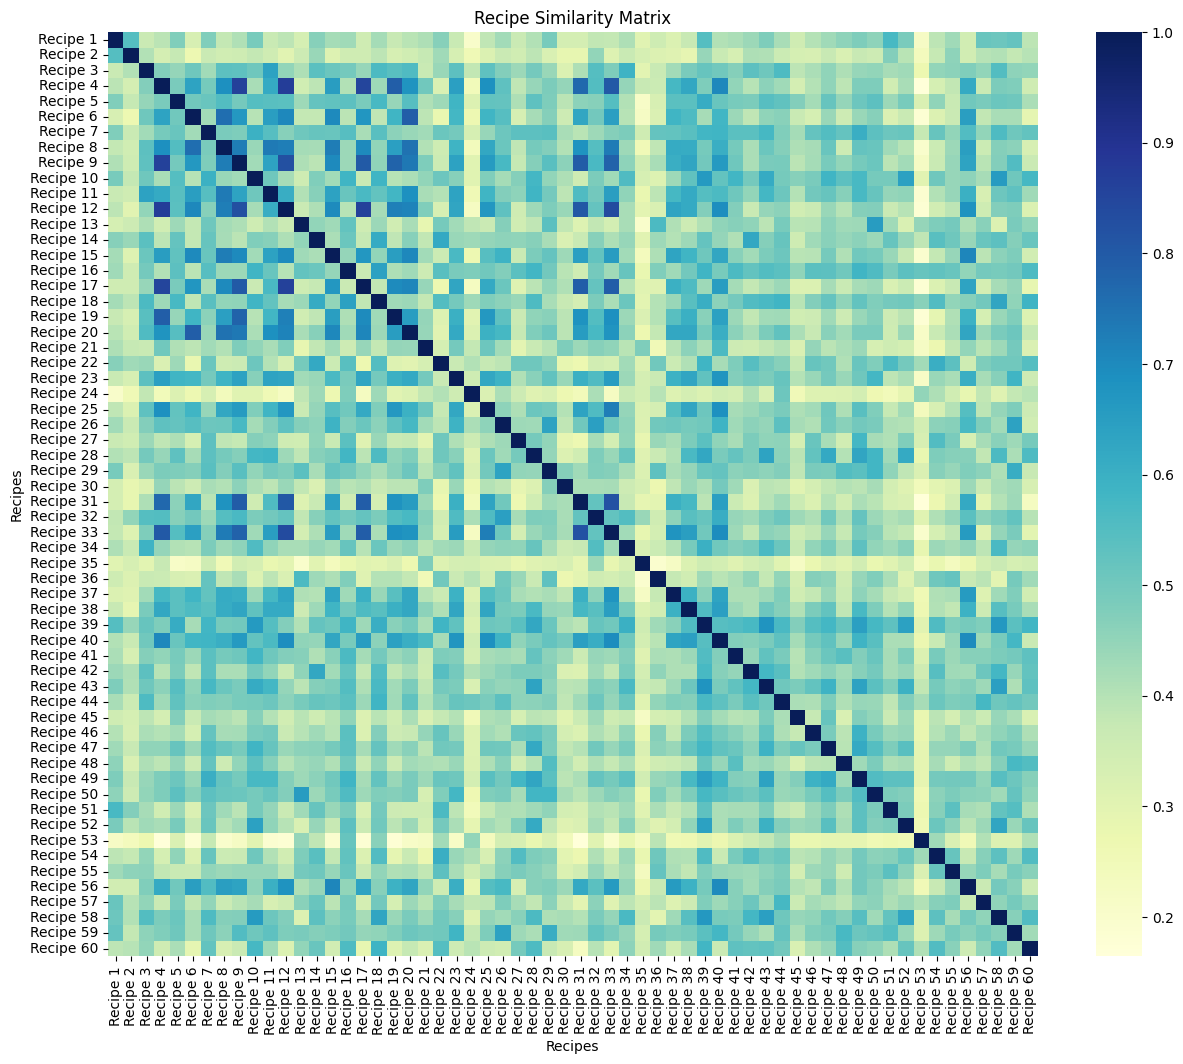

In [11]:
# similarity_matrix = generate_dummy_matrix(size=1000)# Generate a 1000x1000 similarity matrix - for testing purposes


plot_heatmap(similarity_matrix.copy(), labels=None)

# print("Similarity Matrix:")
# print(similarity_matrix)

#### find min, max vals in matrix: 
1. max - similar recipes, 
2. min - very distant recipes)



In [14]:
min_idx, max_idx ,min_value,max_value = min_max_indexes_symetric_df(similarity_matrix)
 
print(f"Min value: {min_value}  - least similar recipes:")
for i in min_idx:
    print(f'recipe {i}:' )
    print_recipe(pd.Series(data1[i]))#show the recipe
      
print(f"Max value: {max_value} - most similar recipes:")
for i in max_idx:
    print(f'recipe {i}:' )
    print_recipe(pd.Series(data1[i]))#show the recipe

Min value: 0.16449681557714937  - least similar recipes:
recipe 30:
Title: Chocolate Roll-Out Cookies 
Ingredients:
 - 2 1/2 cups all purpose flour
 - 1/4 cup unsweetened cocoa powder
 - 1/2 teaspoon baking powder
 - 1/2 teaspoon salt
 - 1/4 teaspoon baking soda
 - 1/2 teaspoon ground cinnamon (optional)
 - 3 ounces bittersweet chocolate, chopped
 - 1 cup (2 sticks) butter, room temperature
 - 1 1/3 cups sugar
 - 1 large egg
 - 1/2 teaspoon vanilla extract
 - Sprinkles or other sugar decorations (optional)
 - Royal Icing (optional)
Instructions:
Sift first 5 ingredients and cinnamon, if desired, into medium bowl. Stir chocolate in metal bowl set over saucepan of simmering water until melted and smooth. Set aside. Using electric mixer, beat butter in large bowl at medium speed until smooth and creamy, about 2 minutes. Add sugar and beat until mixture is pale and fluffy, about 2 minutes. Add egg; beat until well blended, about 1 minute. Reduce speed to low and beat in vanilla and chocola

In [13]:
# import pandas as pd
# from collections import Counter

# # Function to get unique words sorted by frequency
# def get_unique_words(df, columns):
#     # Combine all sentences into a single string and convert to lowercase
#     text = ''
#     for column in columns:
#         text += ' '.join(df[column].loc[df[column].notnull()])
    
#     # Split the text into words
#     words = text.split()

#     # Remove digits from the list of words
#     def isDigit(x):
#         try:
#             float(x)
#             return True
#         except ValueError:
#             return False
#     words = [word for word in words if not isDigit(word) ]#word.isdigit()
    
#     # Count the frequency of each word using Counter
#     word_counts = Counter(words)
    
#     # Sort words by frequency in descending order
#     sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    
#     # Return a list of words sorted by frequency
#     return sorted_words
# unique_words = get_unique_words(df, columns = [i for i in df.columns if 'ingredients' in i])
# # unique_words = get_unique_words(df,[col for col in df.columns if 'ingredients' in col] )#['instructions','ingredients_1']


